# A/B-тестирование: Анализ конверсии пользователей


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


## Генерация данных для A/B-теста


In [2]:
np.random.seed(42)
n_A, n_B = 1000, 1000
conv_A = np.random.binomial(1, 0.12, n_A)
conv_B = np.random.binomial(1, 0.14, n_B)
data = pd.DataFrame({'group': ['A'] * n_A + ['B'] * n_B, 'conversion': np.concatenate([conv_A, conv_B])})


## Подсчет и визуализация конверсии


Конверсия:
group
A    0.124
B    0.148
Name: conversion, dtype: float64


/var/folders/kd/_2qt2l6x10d9__g7c7vj_vq40000gn/T/ipykernel_38253/385020387.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conv_rates.index, y=conv_rates.values, palette=['blue', 'green'])


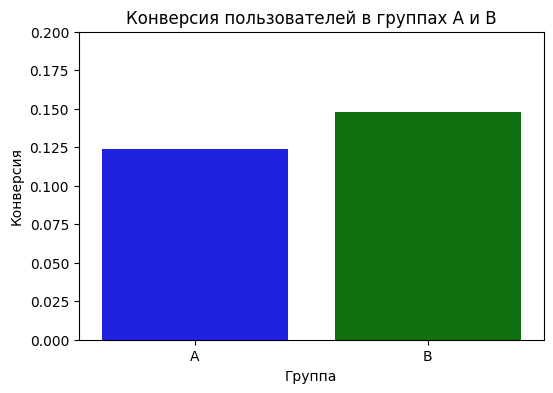

In [3]:
conv_rates = data.groupby('group')['conversion'].mean()
print("Конверсия:")
print(conv_rates)
plt.figure(figsize=(6, 4))
sns.barplot(x=conv_rates.index, y=conv_rates.values, palette=['blue', 'green'])
plt.xlabel("Группа")
plt.ylabel("Конверсия")
plt.title("Конверсия пользователей в группах A и B")
plt.ylim(0, 0.2)
plt.show()


## Статистический тест (T-тест)


In [4]:
stat, p_value = stats.ttest_ind(conv_A, conv_B, equal_var=False)
print(f'P-value: {p_value:.4f}')


P-value: 0.1176


## Визуализация распределения конверсии


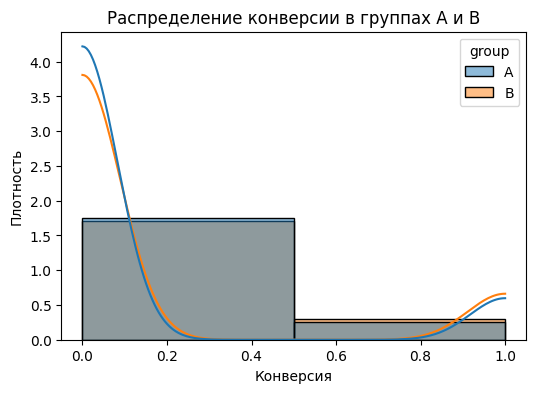

In [5]:
plt.figure(figsize=(6, 4))
sns.histplot(data, x='conversion', hue='group', kde=True, stat='density', common_norm=False, bins=2)
plt.xlabel("Конверсия")
plt.ylabel("Плотность")
plt.title("Распределение конверсии в группах A и B")
plt.show()


## Вывод результата A/B-теста


In [6]:
alpha = 0.05
if p_value < alpha:
    print("Различие статистически значимо, новая кнопка эффективнее!")
else:
    print("Различий нет, новая кнопка не лучше старой.")


Различий нет, новая кнопка не лучше старой.
